In this notebook I create the figures for the fluxtubestability paper.

# Fig. 1 - Theory Summary

In [199]:
import sys
sys.path.append('..')

import sympy as sp
sp.init_printing()

import numpy as np
from scipy.special import kv, kvp

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')


import lambda_k_plotting_simple as plot
reload(plot)
import analytic_condition as ac

In [200]:
import analytic_condition
reload(analytic_condition)
from analytic_condition import conditions

## Fig. 1  Greyscale version

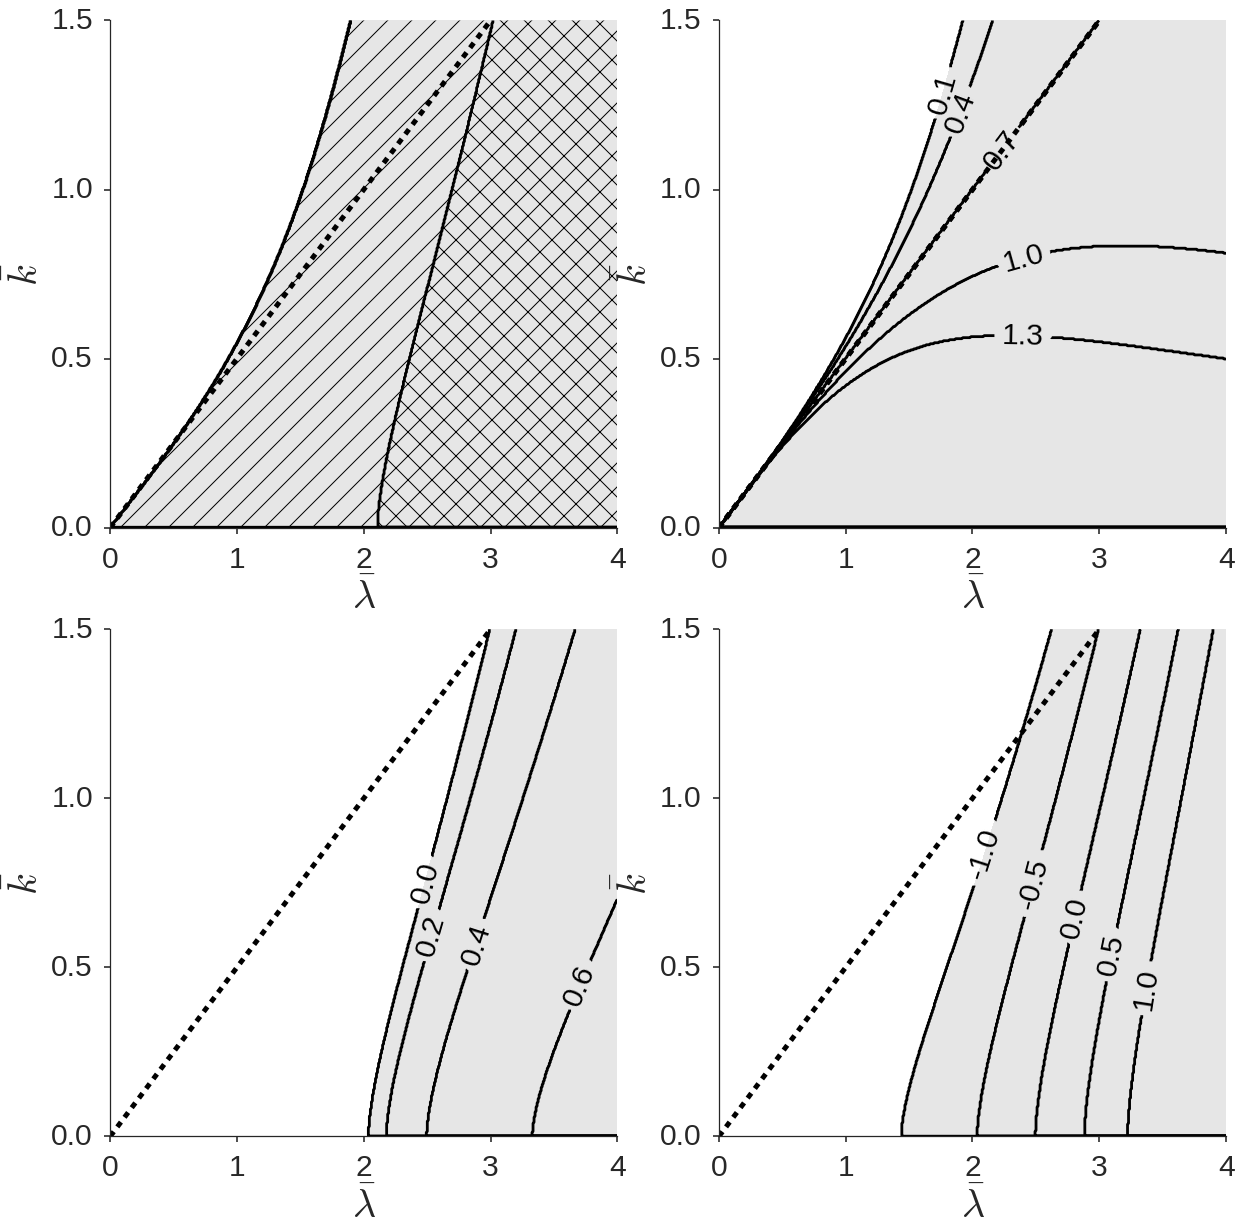

In [20]:
fig, axes = plt.subplots(2, 2,
                         figsize=(20,20),
                         sharex=False, 
                         sharey=False)

example_ax = axes[0][0]
kink_ax = axes[0][1]
sausage_ax = axes[1][0]
delta_ax = axes[1][1]

lambda_bar = np.linspace(0, 4., 500)
k_bar = np.linspace(0, 1.5, 500)
mesh = np.meshgrid(lambda_bar, k_bar)
lambda_bar_mesh, k_bar_mesh = mesh[0], mesh[1]

## Example Plot ##
##################

d_w_sausage = conditions(k_bar_mesh,
                         lambda_bar_mesh,
                         epsilon=0.1,
                         m=0,
                         delta=0.1)
d_w_kink = conditions(k_bar_mesh,
                      lambda_bar_mesh,
                      epsilon=0.1,
                      m=1,
                      delta=0.1)

stability_sausage = d_w_sausage < 0
stability_kink = d_w_kink < 0
stability = stability_kink.astype(float)
stability[stability_sausage] = 2


cmap = colors.ListedColormap(['1.0',
                              '0.9',
                              '0.9'])

example_ax.contourf(lambda_bar_mesh, k_bar_mesh, stability, cmap=cmap,
                    levels=[0., 0.5, 1.5, 2.], hatches=[None, '/', 'x'])
example_ax.contour(lambda_bar_mesh, k_bar_mesh, stability, 
                   levels=[0., 0.5, 1.5, 2.], colors='black')
example_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)

example_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(example_ax.get_xticklabels(), fontsize=30)
example_ax.set_xticks(np.arange(0., 5, 1.))

example_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(example_ax.get_yticklabels(), fontsize=30)
example_ax.set_yticks(np.arange(0., 2.0, 0.5))

## Kink Plot ##
###############

delta = 0.0
stability = np.zeros(lambda_bar_mesh.shape) - 0.2
for i, epsilon in enumerate(np.arange(0.1, 1.9, 0.3)):

    d_w_kink = conditions(k_bar_mesh,
                          lambda_bar_mesh,
                          epsilon=epsilon,
                          m=1,
                          delta=delta)

    stability_epsilon = d_w_kink < 0 
    stability[stability_epsilon] = epsilon

levels = np.arange(0.1, 1.9, 0.3)
contour = kink_ax.contourf(lambda_bar_mesh, 
                           k_bar_mesh, 
                           stability,
                           levels=levels)
contour.cmap.set_over('0.9')
contour.cmap.set_under('white')
contour.set_clim(-0.1, 0.)
contour_lines = kink_ax.contour(lambda_bar_mesh, 
                               k_bar_mesh, 
                               stability,
                               levels=levels, 
                               colors='black')
kink_ax.clabel(contour_lines, fontsize=30, 
                              manual=([1.6, 1.3], 
                                      [2.1, 1.2], 
                                      [2.3, 1.1],
                                      [2.4, 0.8],
                                      [2.4, 0.5]),
                               fmt='%.1f')
for line in contour_lines.collections:
    line.set_linestyle('solid')
    
line_x = np.linspace(0, 3, 50)
line_y = np.linspace(0, 1.5, 50)
    
line_y_masked = np.ma.masked_inside(line_y, 1.05, 1.18)    
    
kink_ax.plot(line_x, line_y_masked, '--', c='black', lw=5)

kink_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
kink_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(kink_ax.get_xticklabels(), fontsize=30)
kink_ax.set_xticks(np.arange(0., 5, 1.))

kink_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(kink_ax.get_yticklabels(), fontsize=30)
kink_ax.set_yticks(np.arange(0., 2.0, 0.5))

## Sausage Plot ##
##################

delta = 0.
stability = np.zeros(lambda_bar_mesh.shape) - 0.2
for i, epsilon in enumerate(np.arange(0, 1.0, 0.2)):

    d_w_sausage = conditions(k_bar_mesh,
                            lambda_bar_mesh,
                            epsilon=epsilon,
                            m=0,
                            delta=delta)

    stability_epsilon = d_w_sausage < 0 
    stability[stability_epsilon] = epsilon

levels = np.arange(0., 1., 0.2)
contour = sausage_ax.contourf(lambda_bar_mesh, 
                              k_bar_mesh, 
                              stability,
                              levels=levels)
contour.cmap.set_over('0.9')
contour.cmap.set_under('white')
contour.set_clim(-0.2, -0.1)

contour_lines = sausage_ax.contour(lambda_bar_mesh, 
                                   k_bar_mesh, 
                                   stability,
                                   levels=levels, 
                                   colors='black')
for line in contour_lines.collections:
    line.set_linestyle('solid')
    
    
sausage_ax.clabel(contour_lines, fontsize=30, 
                              manual=([2.5, 0.75],
                                      [2.5, 0.6], 
                                      [3., 0.55],
                                      [3.3, 0.5]),
                               fmt='%.1f')
    
sausage_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
sausage_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(sausage_ax.get_xticklabels(), fontsize=30)
sausage_ax.set_xticks(np.arange(0., 5, 1.))

sausage_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(sausage_ax.get_yticklabels(), fontsize=30)
sausage_ax.set_yticks(np.arange(0., 2.0, 0.5))

### delta variance ###
######################

epsilon = 0.2
stability = np.zeros(lambda_bar_mesh.shape) - 1.2
for i, delta in enumerate(np.arange(-1.0, 1.6, 0.5)):

    d_w_delta = conditions(k_bar_mesh,
                           lambda_bar_mesh,
                           epsilon=epsilon,
                           m=0,
                           delta=delta)

    stability_delta = d_w_delta < 0 
    stability[stability_delta] = delta

levels = np.arange(-1.0, 1.6, 0.5)
contour = delta_ax.contourf(lambda_bar_mesh, 
                            k_bar_mesh, 
                            stability,
                            levels=levels,
                            extend='both')
levels = np.arange(-1.0, 1.6, 0.5)
contour_lines = delta_ax.contour(lambda_bar_mesh, 
                                 k_bar_mesh, 
                                 stability,
                                 levels=levels, 
                                 colors='black')
contour.cmap.set_over('0.9')
contour.cmap.set_under('white')
contour.set_clim(-1.3, -1.0)

for line in contour_lines.collections:
    line.set_linestyle('solid')
    
sausage_ax.clabel(contour_lines, 
                  fontsize=30, 
                  manual=([2., 0.85],
                          [2.4, 0.75],
                          [2.8, 0.65],
                          [3.0, 0.55],
                          [3.3, 0.45]),
                          fmt='%.1f')
    
delta_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)

delta_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(delta_ax.get_xticklabels(), fontsize=30)
delta_ax.set_xticks(np.arange(0., 5, 1.))

delta_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(delta_ax.get_yticklabels(), fontsize=30)
delta_ax.set_yticks(np.arange(0., 2.0, 0.5))


sns.despine(fig)
fig.savefig('../../figures/figure_1.png')

## Fig.1 Color version

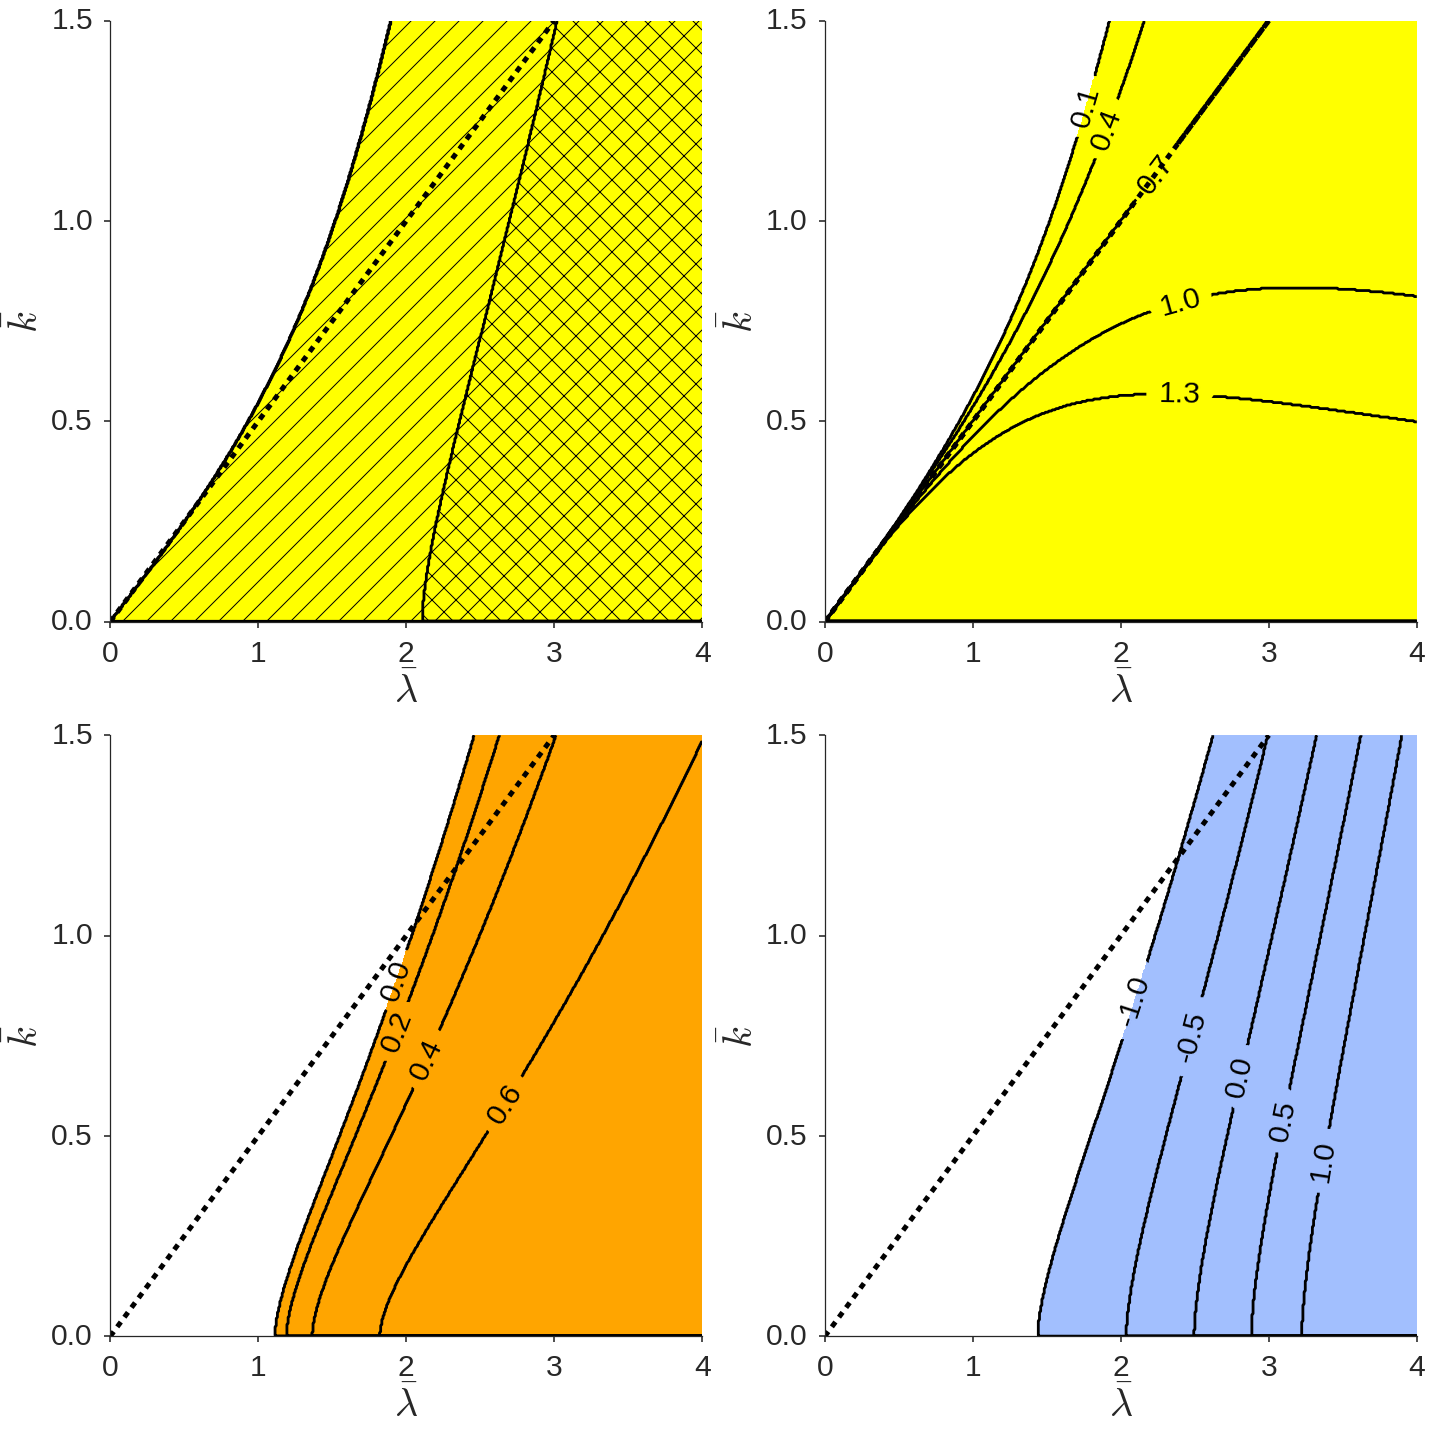

In [229]:
fig, axes = plt.subplots(2, 2,
                         figsize=(20,20),
                         sharex=False, 
                         sharey=False)

example_ax = axes[0][0]
kink_ax = axes[0][1]
sausage_ax = axes[1][0]
delta_ax = axes[1][1]

## Example Plot ##
##################

lambda_bar = np.linspace(0, 4., 500)
k_bar = np.linspace(0, 1.5, 500)
mesh = np.meshgrid(lambda_bar, k_bar)
lambda_bar_mesh, k_bar_mesh = mesh[0], mesh[1]


d_w_sausage = conditions(k_bar_mesh,
                         lambda_bar_mesh,
                         epsilon=0.1,
                         m=0,
                         delta=0.1)
d_w_kink = conditions(k_bar_mesh,
                      lambda_bar_mesh,
                      epsilon=0.1,
                      m=1,
                      delta=0.1)

stability_sausage = d_w_sausage < 0
stability_kink = d_w_kink < 0
stability = stability_kink.astype(float)
stability[stability_sausage] = 2


cmap = colors.ListedColormap(['white',
                              'yellow',
                              'yellow'])

example_ax.contourf(lambda_bar_mesh, k_bar_mesh, stability, cmap=cmap,
                    levels=[0., 0.5, 1.5, 2.], hatches=[None, '/', 'x'])
example_ax.contour(lambda_bar_mesh, k_bar_mesh, stability, 
                   levels=[0., 0.5, 1.5, 2.], colors='black')
example_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)


example_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(example_ax.get_xticklabels(), fontsize=30)
example_ax.set_xticks(np.arange(0., 5, 1.))

example_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(example_ax.get_yticklabels(), fontsize=30)
example_ax.set_yticks(np.arange(0., 2.0, 0.5))

sns.despine()


## Kink Plot ##
###############

delta = 0.0
stability = np.zeros(lambda_bar_mesh.shape) - 0.2
for i, epsilon in enumerate(np.arange(0.1, 1.9, 0.3)):

    d_w_kink = conditions(k_bar_mesh,
                          lambda_bar_mesh,
                          epsilon=epsilon,
                          m=1,
                          delta=delta)

    stability_epsilon = d_w_kink < 0 
    stability[stability_epsilon] = epsilon

levels = np.arange(0.1, 1.9, 0.3)
contour = kink_ax.contourf(lambda_bar_mesh, 
                           k_bar_mesh, 
                           stability,
                           levels=levels)
contour.cmap.set_over('yellow')
contour.cmap.set_under('white')
contour.set_clim(-0.1, 0.)
contour_lines = kink_ax.contour(lambda_bar_mesh, 
                               k_bar_mesh, 
                               stability,
                               levels=levels, 
                               colors='black')
kink_ax.clabel(contour_lines, fontsize=30, 
                              manual=([1.6, 1.3], 
                                      [2.1, 1.2], 
                                      [2.3, 1.1],
                                      [2.4, 0.8],
                                      [2.4, 0.5]),
                               fmt='%.1f')
for line in contour_lines.collections:
    line.set_linestyle('solid')
    
line_x = np.linspace(0, 3, 50)
line_y = np.linspace(0, 1.5, 50)
    
line_y_masked = np.ma.masked_inside(line_y, 1.05, 1.18)    
    
kink_ax.plot(line_x, line_y_masked, '--', c='black', lw=5)


kink_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
kink_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(kink_ax.get_xticklabels(), fontsize=30)
kink_ax.set_xticks(np.arange(0., 5, 1.))

kink_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(kink_ax.get_yticklabels(), fontsize=30)
kink_ax.set_yticks(np.arange(0., 2.0, 0.5))

sns.despine()

## Sausage Plot ##
##################

delta = -0.7
stability = np.zeros(lambda_bar_mesh.shape) - 0.2
for i, epsilon in enumerate(np.arange(0, 1.2, 0.2)):

    d_w_sausage = conditions(k_bar_mesh,
                            lambda_bar_mesh,
                            epsilon=epsilon,
                            m=0,
                            delta=delta)

    stability_epsilon = d_w_sausage < 0 
    stability[stability_epsilon] = epsilon

levels = np.arange(0., 1.2, 0.2)
contour = sausage_ax.contourf(lambda_bar_mesh, 
                              k_bar_mesh, 
                              stability,
                              levels=levels)
contour.cmap.set_over('orange')
contour.cmap.set_under('white')
contour.set_clim(-0.2, -0.1)

contour_lines = sausage_ax.contour(lambda_bar_mesh, 
                                   k_bar_mesh, 
                                   stability,
                                   levels=levels, 
                                   colors='black')
for line in contour_lines.collections:
    line.set_linestyle('solid')
    
    
sausage_ax.clabel(contour_lines, fontsize=30, 
                              manual=([1.85, 0.9],
                                      [2.0, 0.75],
                                      [2.4, 0.65],
                                      [2.8, 0.55]),
                               fmt='%.1f')
    
sausage_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
sausage_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(sausage_ax.get_xticklabels(), fontsize=30)
sausage_ax.set_xticks(np.arange(0., 5, 1.))

sausage_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(sausage_ax.get_yticklabels(), fontsize=30)
sausage_ax.set_yticks(np.arange(0., 2.0, 0.5))
sns.despine()


## Delta dependence ##
######################

epsilon = 0.2
stability = np.zeros(lambda_bar_mesh.shape) - 1.2
for i, delta in enumerate(np.arange(-1.0, 1.6, 0.5)):

    d_w_delta = conditions(k_bar_mesh,
                           lambda_bar_mesh,
                           epsilon=epsilon,
                           m=0,
                           delta=delta)

    stability_delta = d_w_delta < 0 
    stability[stability_delta] = delta

levels = np.arange(-1.0, 1.6, 0.5)
contour = delta_ax.contourf(lambda_bar_mesh, 
                            k_bar_mesh, 
                            stability,
                            levels=levels,
                            extend='both')
levels = np.arange(-1.0, 1.6, 0.5)
contour_lines = delta_ax.contour(lambda_bar_mesh, 
                                 k_bar_mesh, 
                                 stability,
                                 levels=levels, 
                                 colors='black')
contour.cmap.set_over(sns.xkcd_rgb['pastel blue'])
contour.cmap.set_under('white')
contour.set_clim(-1.3, -1.0)

for line in contour_lines.collections:
    line.set_linestyle('solid')
    
sausage_ax.clabel(contour_lines, 
                  fontsize=30, 
                  manual=([2., 0.85],
                          [2.4, 0.75],
                          [2.8, 0.65],
                          [3.0, 0.55],
                          [3.3, 0.45]),
                          fmt='%.1f')
    
delta_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
delta_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(delta_ax.get_xticklabels(), fontsize=30)
delta_ax.set_xticks(np.arange(0., 5, 1.))

delta_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(delta_ax.get_yticklabels(), fontsize=30)
delta_ax.set_yticks(np.arange(0., 2.0, 0.5))

plt.tight_layout()

plt.show()

# Individual Plots for talks

In [21]:
lambda_bar = np.linspace(0, 4., 500)
k_bar = np.linspace(0, 1.5, 500)
mesh = np.meshgrid(lambda_bar, k_bar)
lambda_bar_mesh, k_bar_mesh = mesh[0], mesh[1]

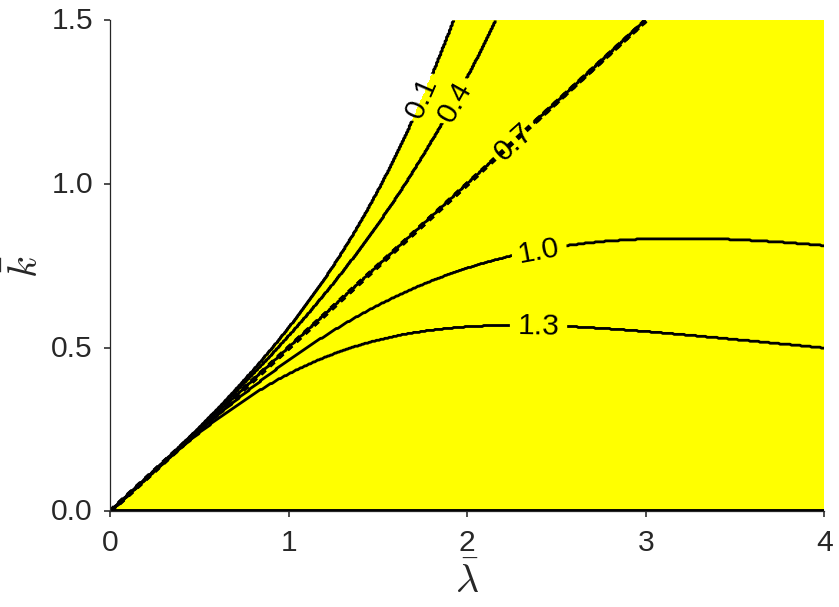

In [102]:
kink_ax = plt.gca()

delta = 0.0
stability = np.zeros(lambda_bar_mesh.shape) - 0.2
for i, epsilon in enumerate(np.arange(0.1, 1.9, 0.3)):

    d_w_kink = conditions(k_bar_mesh,
                          lambda_bar_mesh,
                          epsilon=epsilon,
                          m=1,
                          delta=delta)

    stability_epsilon = d_w_kink < 0 
    stability[stability_epsilon] = epsilon

levels = np.arange(0.1, 1.9, 0.3)
contour = kink_ax.contourf(lambda_bar_mesh, 
                           k_bar_mesh, 
                           stability,
                           levels=levels)
contour.cmap.set_over('yellow')
contour.cmap.set_under('white')
contour.set_clim(-0.1, 0.)
contour_lines = kink_ax.contour(lambda_bar_mesh, 
                               k_bar_mesh, 
                               stability,
                               levels=levels, 
                               colors='black')
kink_ax.clabel(contour_lines, fontsize=30, 
                              manual=([1.6, 1.3], 
                                      [2.1, 1.2], 
                                      [2.3, 1.1],
                                      [2.4, 0.8],
                                      [2.4, 0.5]),
                               fmt='%.1f')
for line in contour_lines.collections:
    line.set_linestyle('solid')
    
line_x = np.linspace(0, 3, 50)
line_y = np.linspace(0, 1.5, 50)
    
line_y_masked = np.ma.masked_inside(line_y, 1.05, 1.18)    
    
kink_ax.plot(line_x, line_y_masked, '--', c='black', lw=5)


kink_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
kink_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(kink_ax.get_xticklabels(), fontsize=30)
kink_ax.set_xticks(np.arange(0., 5, 1.))

kink_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(kink_ax.get_yticklabels(), fontsize=30)
kink_ax.set_yticks(np.arange(0., 2.0, 0.5))

sns.despine()
plt.show()

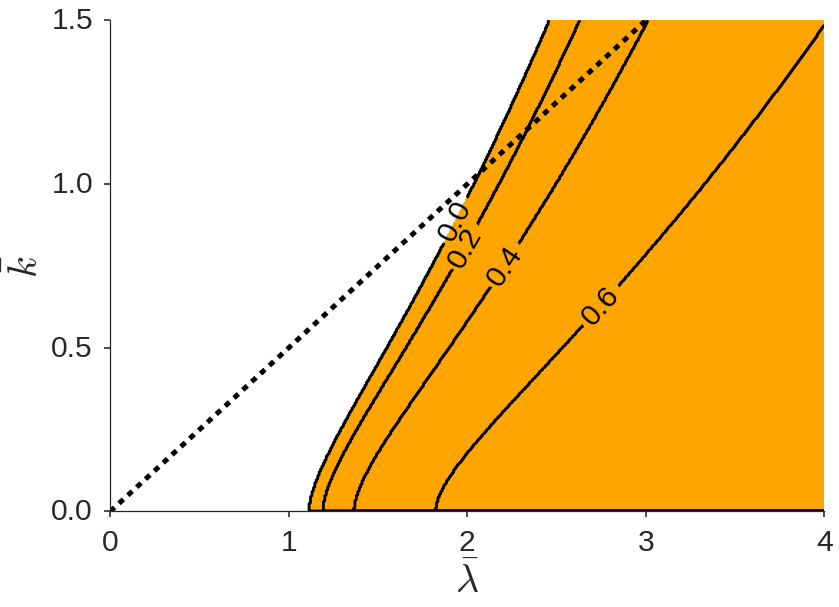

In [100]:
sausage_ax = plt.gca()

delta = -0.7
stability = np.zeros(lambda_bar_mesh.shape) - 0.2
for i, epsilon in enumerate(np.arange(0, 1.2, 0.2)):

    d_w_sausage = conditions(k_bar_mesh,
                            lambda_bar_mesh,
                            epsilon=epsilon,
                            m=0,
                            delta=delta)

    stability_epsilon = d_w_sausage < 0 
    stability[stability_epsilon] = epsilon

levels = np.arange(0., 1.2, 0.2)
contour = sausage_ax.contourf(lambda_bar_mesh, 
                              k_bar_mesh, 
                              stability,
                              levels=levels)
contour.cmap.set_over('orange')
contour.cmap.set_under('white')
contour.set_clim(-0.2, -0.1)

contour_lines = sausage_ax.contour(lambda_bar_mesh, 
                                   k_bar_mesh, 
                                   stability,
                                   levels=levels, 
                                   colors='black')
for line in contour_lines.collections:
    line.set_linestyle('solid')
    
    
sausage_ax.clabel(contour_lines, fontsize=30, 
                              manual=([1.9, 0.9],
                                      [2.0, 0.8],
                                      [2.4, 0.7],
                                      [2.8, 0.6]),
                               fmt='%.1f')
    
sausage_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
sausage_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(sausage_ax.get_xticklabels(), fontsize=30)
sausage_ax.set_xticks(np.arange(0., 5, 1.))

sausage_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(sausage_ax.get_yticklabels(), fontsize=30)
sausage_ax.set_yticks(np.arange(0., 2.0, 0.5))
sns.despine()
plt.show()

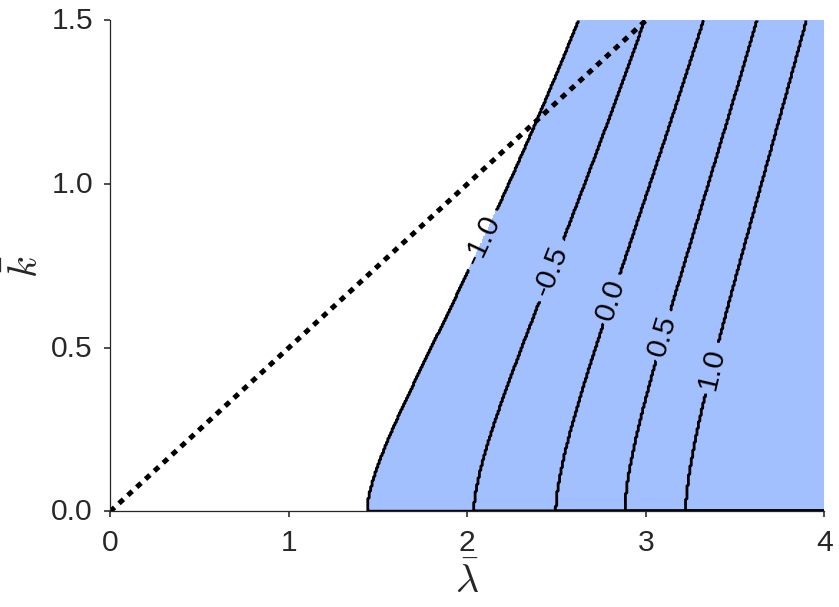

In [103]:
delta_ax = plt.gca()
epsilon = 0.2
stability = np.zeros(lambda_bar_mesh.shape) - 1.2
for i, delta in enumerate(np.arange(-1.0, 1.6, 0.5)):

    d_w_delta = conditions(k_bar_mesh,
                           lambda_bar_mesh,
                           epsilon=epsilon,
                           m=0,
                           delta=delta)

    stability_delta = d_w_delta < 0 
    stability[stability_delta] = delta

levels = np.arange(-1.0, 1.6, 0.5)
contour = delta_ax.contourf(lambda_bar_mesh, 
                            k_bar_mesh, 
                            stability,
                            levels=levels,
                            extend='both')
levels = np.arange(-1.0, 1.6, 0.5)
contour_lines = delta_ax.contour(lambda_bar_mesh, 
                                 k_bar_mesh, 
                                 stability,
                                 levels=levels, 
                                 colors='black')
contour.cmap.set_over(sns.xkcd_rgb['pastel blue'])
contour.cmap.set_under('white')
contour.set_clim(-1.3, -1.0)

for line in contour_lines.collections:
    line.set_linestyle('solid')
    
sausage_ax.clabel(contour_lines, 
                  fontsize=30, 
                  manual=([2., 0.85],
                          [2.4, 0.75],
                          [2.8, 0.65],
                          [3.0, 0.55],
                          [3.3, 0.45]),
                          fmt='%.1f')
    
delta_ax.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)
delta_ax.set_xlabel(r'$\bar{\lambda}$', fontsize=40)
plt.setp(delta_ax.get_xticklabels(), fontsize=30)
delta_ax.set_xticks(np.arange(0., 5, 1.))

delta_ax.set_ylabel(r'$\bar{k}$', fontsize=40)
plt.setp(delta_ax.get_yticklabels(), fontsize=30)
delta_ax.set_yticks(np.arange(0., 2.0, 0.5))

sns.despine()

In [50]:
plt.subplot?

In [53]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 13)

In [54]:
gs.update?

# Fig. 2 - Numerics Profile

# two kink plots

### $\epsilon= 0.9$ $r_{skin}=0.03$

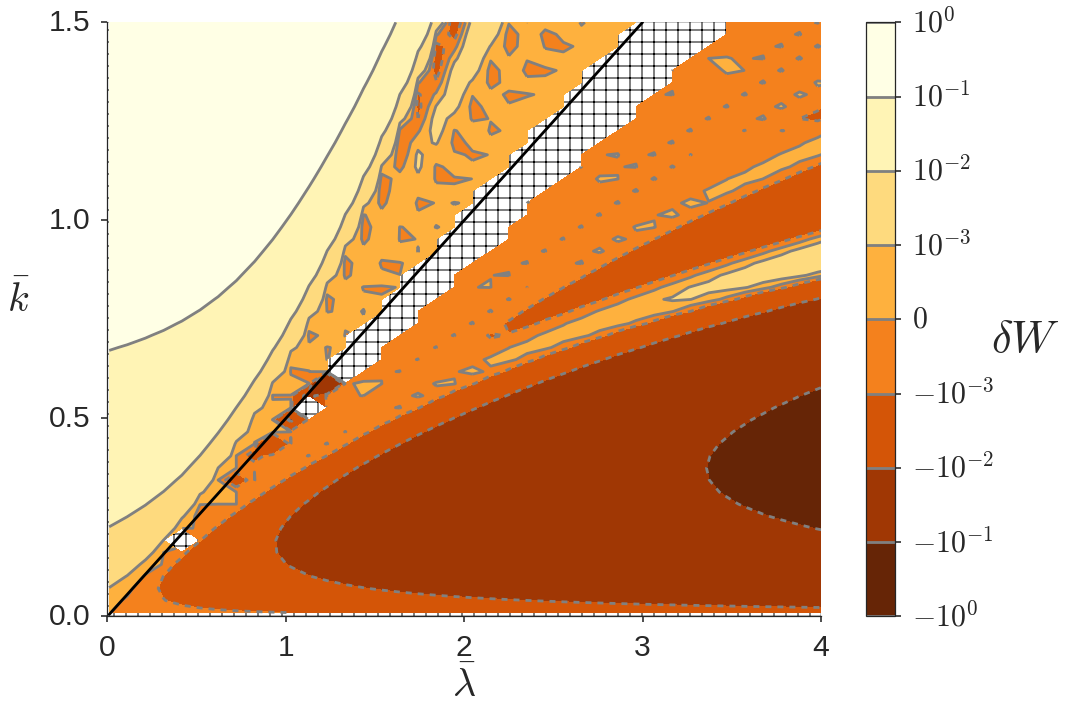

In [226]:
fig = plt.figure(figsize=(15,10))

plot.plot_lambda_k_space_dw('../../output/2016-01-31-13-02/meshes.npz', 
                            1., 'ep12-m1', mode_to_plot='m_neg_1', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            norm=True, analytic_compare=False,
                            log=False,
                            label_pos=None,
                            interpolate=False, cmap="YlOrBr_r",
                            hatch=True,
                            bounds=(1.5, 4))

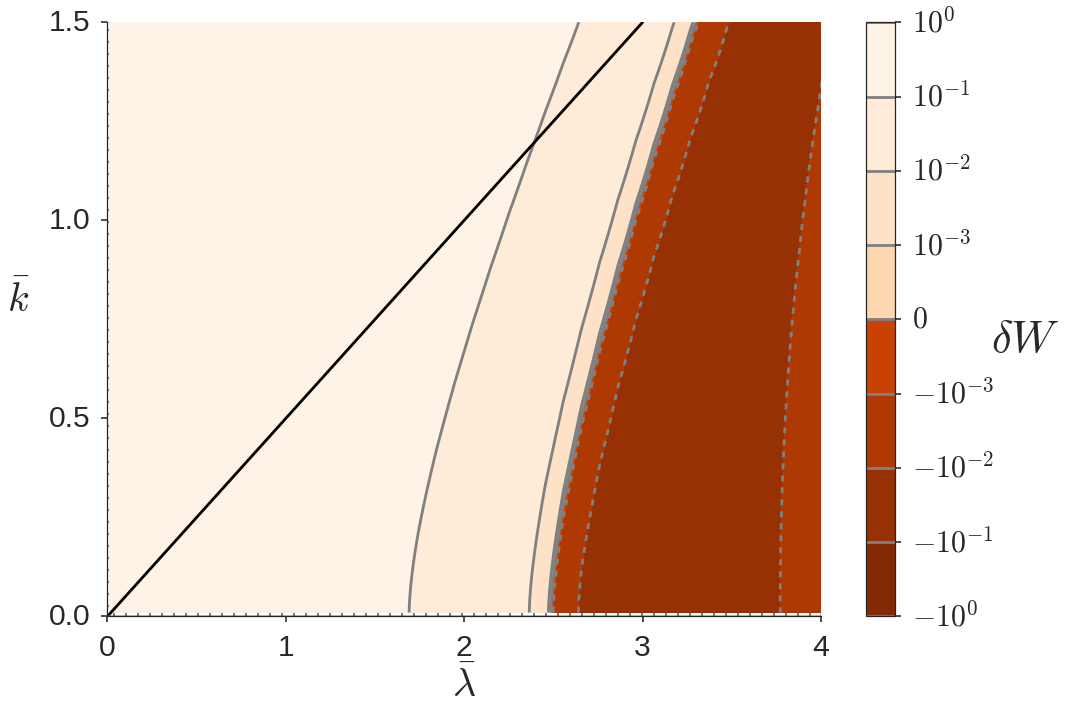

In [225]:
fig = plt.figure(figsize=(15,10))

plot.plot_lambda_k_space_dw('../../output/2016-01-31-13-02/meshes.npz', 
                            1., 'ep12-m1', mode_to_plot='m_0', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            norm=True, analytic_compare=False,
                            log=True,
                            label_pos=None,
                            interpolate=False, cmap="Oranges_r",
                            hatch=True,
                            bounds=(1.5, 4.0))

### $\epsilon= 0.5$ $r_{skin}=0.03$

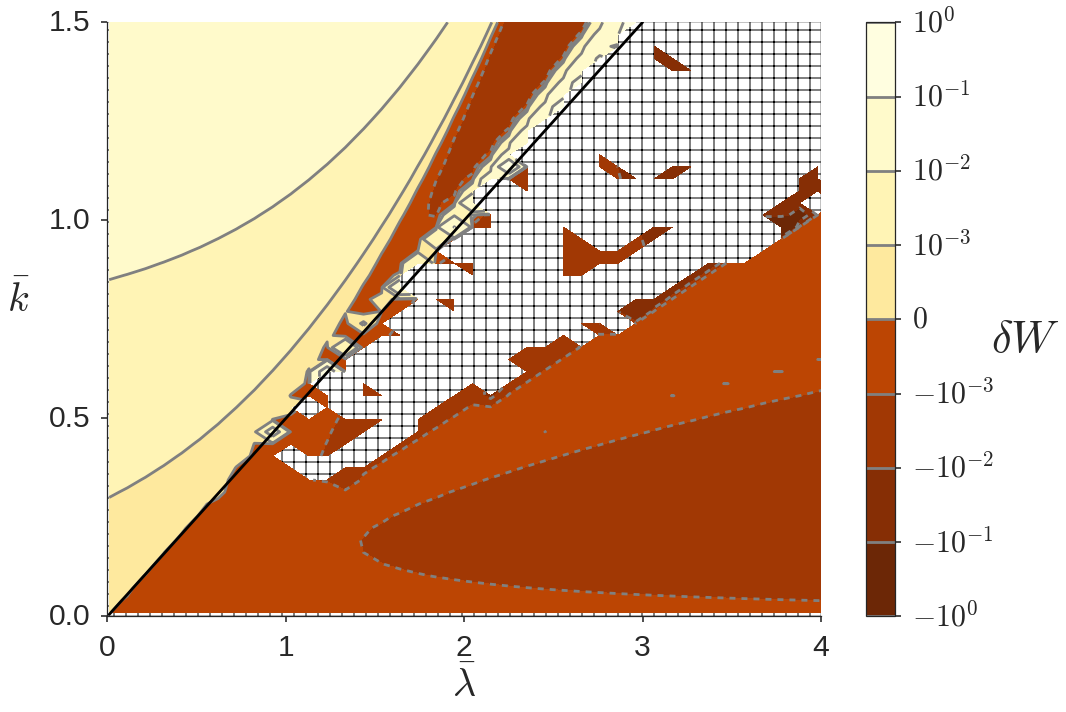

In [230]:
fig = plt.figure(figsize=(15,10))

plot.plot_lambda_k_space_dw('../../output/2016-01-31-14-28/meshes.npz', 
                            1., 'ep12-m1', mode_to_plot='m_neg_1', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            norm=True, analytic_compare=False,
                            log=True,
                            label_pos=None,
                            interpolate=False, cmap="YlOrBr_r",
                            bounds=(1.5, 4),
                            hatch=True)

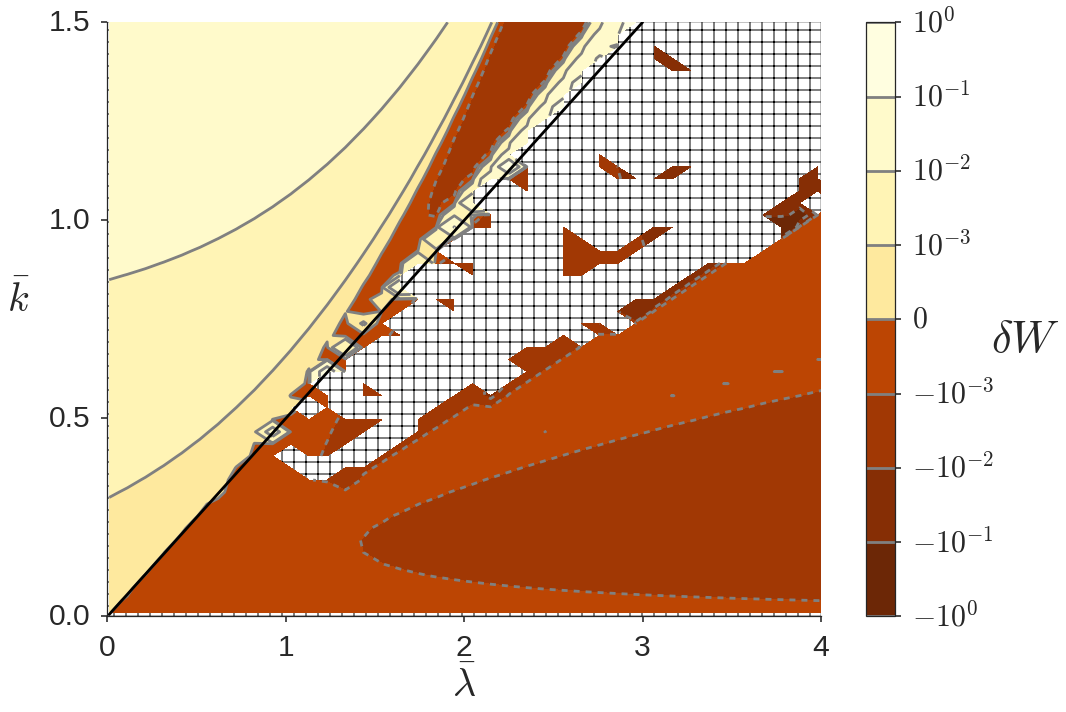

In [231]:
fig = plt.figure(figsize=(15,10))

plot.plot_lambda_k_space_dw('../../output/2016-01-31-14-51/meshes.npz', 
                            1., 'ep12-m1', mode_to_plot='m_neg_1', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            norm=True, analytic_compare=False,
                            log=True,
                            label_pos=None,
                            interpolate=False, cmap="YlOrBr_r",
                            bounds=(1.5, 4),
                            hatch=True)

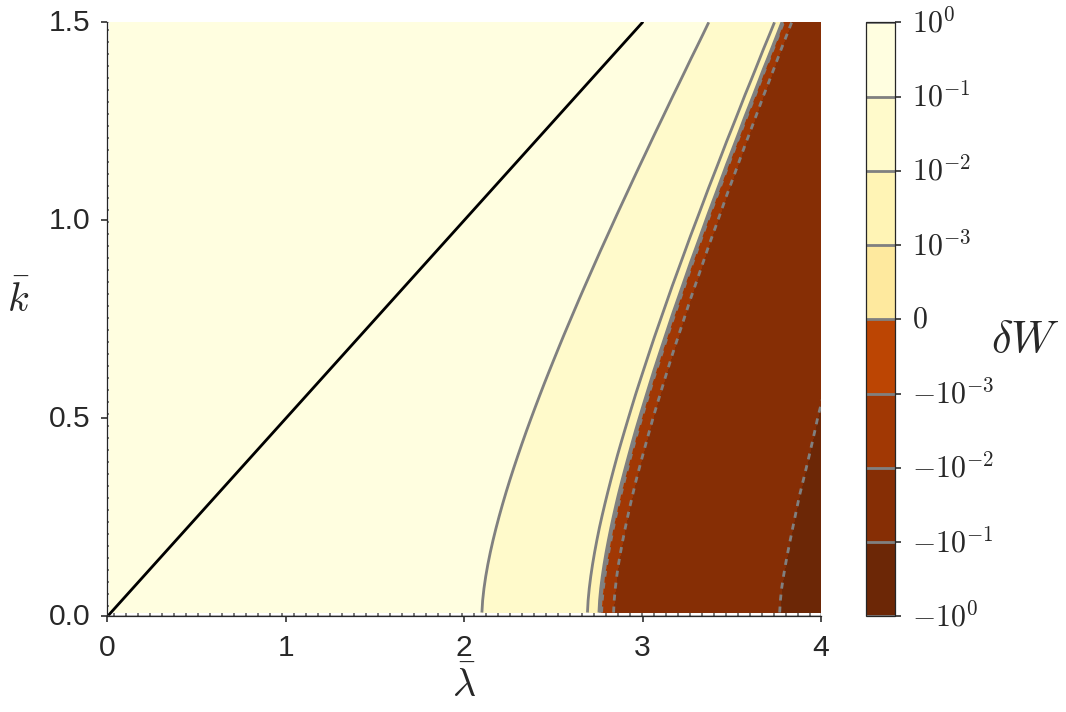

In [223]:
fig = plt.figure(figsize=(15,10))

plot.plot_lambda_k_space_dw('../../output/2016-01-31-13-24/meshes.npz', 
                            1., 'ep12-m1', mode_to_plot='m_0', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            norm=True, analytic_compare=False,
                            log=True,
                            label_pos=None,
                            bounds=(1.5, 4),
                            interpolate=False, cmap="YlOrBr_r",
                            hatch=True)

## plot of sausage over kink dW 

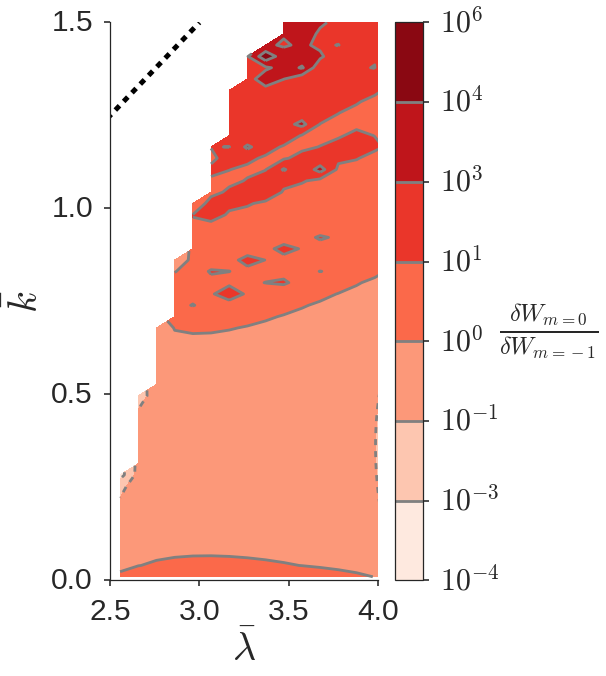

In [227]:
fig = plt.figure(figsize=(6,10))

plot.sausage_kink_ratio('../../output/2016-01-31-13-02/meshes.npz',
                        xy_limits=[0, 1.5, 2.5, 4], cmap="Reds")

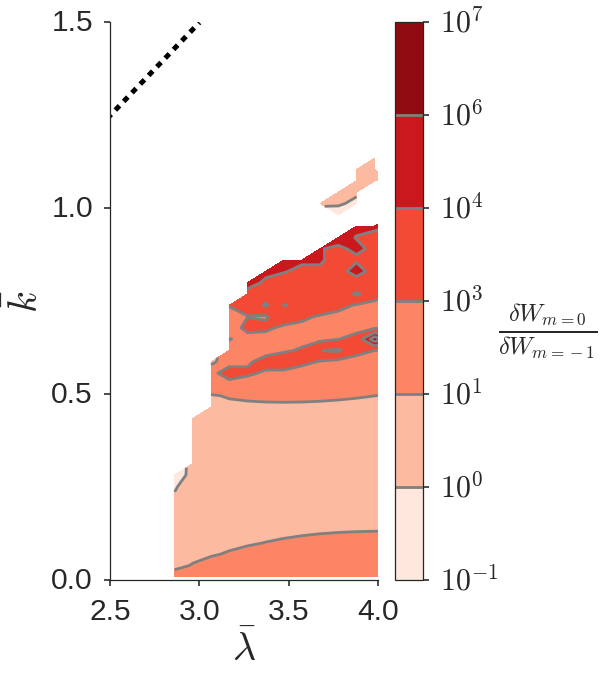

In [228]:
fig = plt.figure(figsize=(6,10))

plot.sausage_kink_ratio('../../output/2016-01-31-13-24/meshes.npz',
                        xy_limits=[0, 1.5, 2.5, 4], cmap="Reds")

## Extras, used in talk

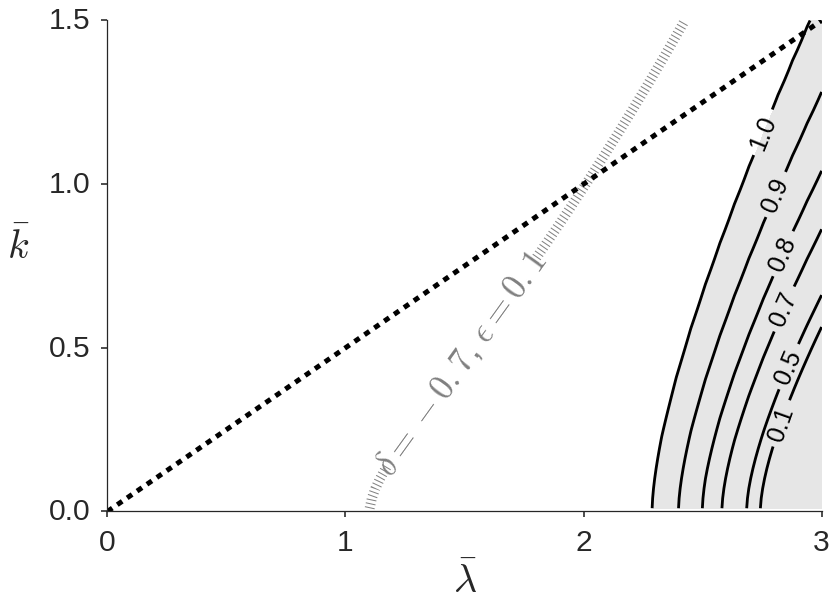

In [48]:
path_begin = '../../output/'
path_end = '/meshes.npz'

epsilons = [1.0, 0.9, 0.8, 0.7, 0.5, 0.1]
filenames = ['2016-01-01-11-45',
             '2016-01-03-14-22',
             '2016-01-03-14-27',
             '2016-01-03-14-32',
             '2016-01-01-11-50',
             '2016-01-01-11-55']
label_pos = [(2.6, 1.2),
             (2.7, 1.0),
             (2.8, 0.8),
             (2.9, 0.6),
             (3.0, 0.4),
             (3.1, 0.2)]


filename = path_begin + filenames[0] + path_end
meshes = np.load(filename)
lambda_a_mesh = meshes['lambda_a_mesh']
k_a_mesh = meshes['k_a_mesh']
external_m_neg_1 = meshes['d_w_m_neg_1']
external_sausage = meshes['d_w_m_0']
external_m_neg_1_norm = meshes['d_w_norm_m_neg_1']
external_sausage_norm = meshes['d_w_norm_m_0']
meshes.close()

levels = [0, 1]
     
contourf = plt.contourf(lambda_a_mesh, 
                        k_a_mesh, 
                        external_sausage,
                        levels=levels,
                        extend='both')
    
contourf.cmap.set_over('white')
contourf.cmap.set_under('0.9')
contourf.set_clim(0., 1e-16)

for i, epsilon in enumerate(epsilons):
    filename = path_begin + filenames[i] + path_end
    meshes = np.load(filename)
    lambda_a_mesh = meshes['lambda_a_mesh']
    k_a_mesh = meshes['k_a_mesh']
    external_m_neg_1 = meshes['d_w_m_neg_1']
    external_sausage = meshes['d_w_m_0']
    external_m_neg_1_norm = meshes['d_w_norm_m_neg_1']
    external_sausage_norm = meshes['d_w_norm_m_0']
    meshes.close()
    
    contour = plt.contour(lambda_a_mesh, 
                          k_a_mesh, 
                          external_sausage, 
                          levels=[0], 
                          colors='black')
    plt.clabel(contour, fmt={0: str(epsilon)}, 
               fontsize=25, 
               manual=[label_pos[i]])
    
plt.plot([0, 3.], [0., 1.5], '--', c='black', lw=5)

plt.xlabel(r'$\bar{\lambda}$', fontsize=40)
sausage_numeric_ax = plt.gca()
plt.setp(sausage_numeric_ax.get_xticklabels(), fontsize=30)
sausage_numeric_ax.set_xticks(np.arange(0., 5, 1.))

plt.ylabel(r'$\bar{k}$', fontsize=40, rotation='horizontal', labelpad=30)
plt.setp(sausage_numeric_ax.get_yticklabels(), fontsize=30)
sausage_numeric_ax.set_yticks(np.arange(0., 2.0, 0.5))
plt.xlim(0, 3.)

stability_uniform_sausage = ac.conditions(k_a_mesh, lambda_a_mesh,
                                           0.1, 0, -0.7)
uniform_contour = plt.contour(lambda_a_mesh, k_a_mesh, stability_uniform_sausage,
                              levels=[0], colors='grey', linewidths=10,
                              linestyles='dotted')

plt.clabel(uniform_contour, fmt={0: r'$\delta =-0.7$, $\epsilon = 0.1$'}, fontsize=35,
           manual=[(1.4, 0.5)])


sns.despine()
plt.show()

# $\delta$ map of $\epsilon$ = 0.1

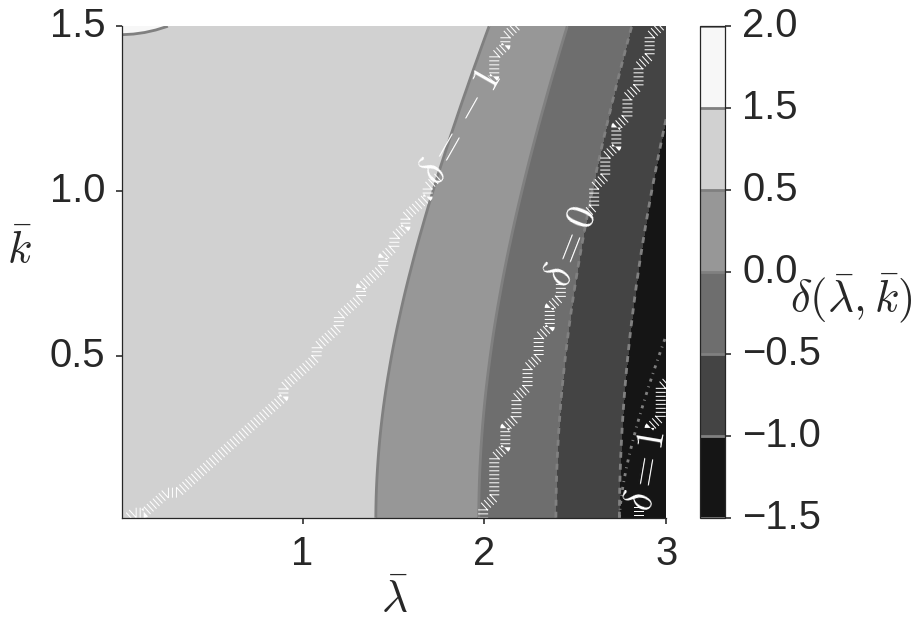

In [44]:
plot.plot_lambda_k_space_delta('../../output/2016-01-01-11-55/meshes.npz',
                               0, levels=[-1.5, -1, 
                                          -0.5, 0, 0.5, 1.5, 2],
                               interpolate=False, clip=True, delta_min=-4, 
                               delta_max=4,epsilon=0.1, compare_analytic=True,
                               plot_numeric_boundary=True, 
                               analytic_label_pos=[(1.8, 1.2), (2.3, 0.9), (2.9, 0.15)],
                               cmap="Greys_r", analytic_color='white')